El siguiente notebook se desarrolló durante la ayudantía del 04-06.

Se muestra un ejemplo de uso para los algoritmos KNN, decision tree y random forest, usando **sklearn**. Se usa el dataset 'music features' ubicado en _kaggle.com/datasets/insiyeah/musicfeatures_, el cual tiene como objetivo la clasificación de varios géneros musicales en función de algunas características de la señal.

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import numpy as np

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# KNN

In [17]:
datos = pd.read_csv("data.csv")

datos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   filename            1000 non-null   object 
 1   tempo               1000 non-null   float64
 2   beats               1000 non-null   int64  
 3   chroma_stft         1000 non-null   float64
 4   rmse                1000 non-null   float64
 5   spectral_centroid   1000 non-null   float64
 6   spectral_bandwidth  1000 non-null   float64
 7   rolloff             1000 non-null   float64
 8   zero_crossing_rate  1000 non-null   float64
 9   mfcc1               1000 non-null   float64
 10  mfcc2               1000 non-null   float64
 11  mfcc3               1000 non-null   float64
 12  mfcc4               1000 non-null   float64
 13  mfcc5               1000 non-null   float64
 14  mfcc6               1000 non-null   float64
 15  mfcc7               1000 non-null   float64
 16  mfcc8  

In [18]:
datos.describe()

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,119.601702,57.138000,0.378656,0.130929,2201.834226,2242.559613,4571.702159,0.103637,-144.479173,99.552199,...,-6.021121,4.471604,-4.797232,1.781547,-3.870275,1.147988,-3.967431,0.507303,-2.328779,-1.094875
std,28.297367,14.225728,0.081689,0.065685,715.961347,526.337663,1574.770035,0.041834,100.235661,31.331904,...,6.819018,6.717312,6.170919,5.009489,4.874423,4.579110,4.550650,3.869088,3.755574,3.837561
min,54.978391,18.000000,0.171782,0.005276,569.930721,897.994319,749.062137,0.021701,-552.064063,-1.527148,...,-28.052265,-15.805227,-27.542309,-12.598773,-17.545474,-15.693589,-17.227765,-11.975698,-18.504188,-19.935203
25%,99.384014,47.000000,0.319641,0.086625,1627.793931,1907.136505,3380.956639,0.070281,-200.695133,76.811480,...,-10.966826,-0.551576,-9.363372,-1.640080,-7.164838,-1.857098,-7.194297,-2.003979,-4.670281,-3.368000
50%,117.453835,56.000000,0.383075,0.122448,2209.468780,2221.408983,4658.671830,0.099539,-120.206072,98.452551,...,-5.920161,3.891842,-4.199810,1.879424,-3.614473,1.211944,-4.059109,0.669788,-2.391261,-1.155198
75%,135.999178,65.250000,0.435974,0.175793,2691.969702,2578.474352,5534.197785,0.132007,-73.895019,119.893638,...,-1.004241,9.706133,-0.161017,5.155264,-0.323536,4.350694,-0.842968,3.112518,0.149070,1.303739
max,234.907670,117.000000,0.663573,0.398012,4434.439444,3509.578677,8676.405868,0.274829,42.034587,193.096518,...,17.421038,23.037571,13.054333,18.161663,12.357588,13.468803,11.489994,15.379257,14.686910,15.368966


Eliminamos la columna 'filename' porque sólo es un ID (único para cada registro) y no nos da información

In [19]:
datos = datos.drop(columns = 'filename')

Separar las features de las etiquetas

In [20]:
X = datos.drop("label", axis=1)
y = datos["label"]

Escalamos los datos para poder comparar features entre sí.

In [21]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), index = X.index)

Calculamos el pca

In [22]:
pca = PCA()
X_pca = pd.DataFrame(pca.fit_transform(X), index = X.index)

Graficamos los dos primeros componentes del PCA()

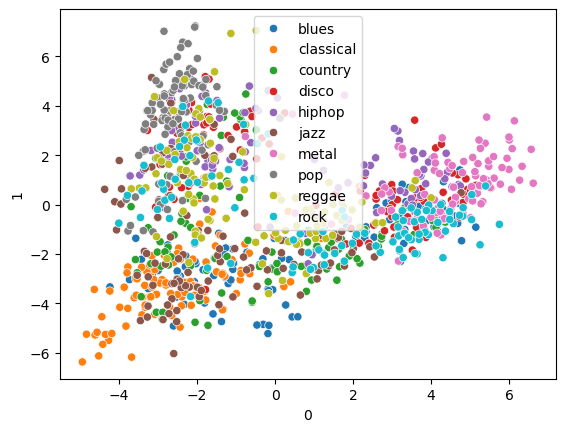

In [23]:
sns.scatterplot(X_pca,x = 0 , y = 1, hue = (y).astype(str))
plt.legend()
plt.show()

Vemos la varianza explicada por cada componente del PCA. Note que para alcanzar >80% se requieren 6 compontes

In [12]:
exp_var = pd.DataFrame(pca.explained_variance_ratio_, columns=["explained_variance"])
exp_var["acumulativo"] = exp_var.explained_variance.cumsum()
exp_var

,explained_variance,acumulativo
0,0.300156,0.300156
1,0.237350,0.537506
2,0.097190,0.634696
3,0.069538,0.704233
4,0.055514,0.759748
5,0.033587,0.793335
6,0.031778,0.825114
7,0.026267,0.851380
8,0.019326,0.870706
9,0.016334,0.887040


Para hacer más entendible el ejemplo, apartamos todos los registros que tengan etiqueta: metal, pop, classical y jazz.

In [28]:
# Busca los elementos que cumplen la condición
sample_index = y[(y == "metal") | (y == "pop") | (y== "classical") | (y== "jazz")].index

# Aparta los elementos con esos índices
X_sample = X_pca.loc[sample_index]
y_sample = y.loc[sample_index]

Como vamos a entrenar un modelo de clasificación, separamos el dataset en entrenamiento y prueba.

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.3, random_state=42)

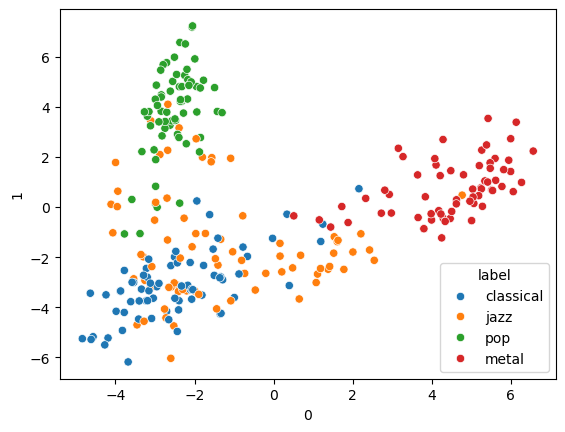

In [31]:
sns.scatterplot(X_train,x = 0 , y = 1, hue = (y_train).astype(str))
plt.show()

Utilizamos el algoritmo KNN para clasificar cada punto del test en función de los vecinos más cercanos

In [49]:
knn = KNeighborsClassifier(n_neighbors=5, weights= 'distance') # weights= 'distance'
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[33  4  0  0]
 [ 4 15  1  5]
 [ 0  0 30  0]
 [ 0  0  0 28]]
              precision    recall  f1-score   support

   classical       0.89      0.89      0.89        37
        jazz       0.79      0.60      0.68        25
       metal       0.97      1.00      0.98        30
         pop       0.85      1.00      0.92        28

    accuracy                           0.88       120
   macro avg       0.87      0.87      0.87       120
weighted avg       0.88      0.88      0.88       120



# Decision Tree

### - Muy interpretables.
###    - Vamos a usar todas las columnas -> NO VAMOS A USAR PCA 

Empecemos de nuevo con el dataset. Sin split, sin pca, sin ningún cambio.

In [50]:
datos = pd.read_csv("data.csv")

datos = datos.drop(columns = 'filename')

X = datos.drop("label", axis=1)
y = datos["label"]

Nuevamente, dejamos sólo los datos con metal, pop, clásica, y jazz.

In [51]:
sample_index = y[(y == "metal") | (y == "pop") | (y== "classical") | (y== "jazz")].index
X_sample = X.loc[sample_index]
y_sample = y.loc[sample_index]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.3, random_state=42)

#### los parámetros que podemos cambiar en la función DecisionTreeClassifier() son:

_criterion_ : "gini" , "entropy"

_max_depth_ : Profundidad máxima del árbol.

_min_samples_split_ : Número mínimo de muestras requeridas para dividir un nodo.

_min_samples_leaf_ :Número mínimo de muestras en una hoja.

_max_features_ : Número máximo de atributos a considerar para dividir en cada nodo.

_class_weight_ : Peso asignado a cada clase

In [61]:
model = DecisionTreeClassifier(max_depth= 50)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[29  8  0  0]
 [ 5 19  1  0]
 [ 0  2 28  0]
 [ 0  2  0 26]]
              precision    recall  f1-score   support

   classical       0.85      0.78      0.82        37
        jazz       0.61      0.76      0.68        25
       metal       0.97      0.93      0.95        30
         pop       1.00      0.93      0.96        28

    accuracy                           0.85       120
   macro avg       0.86      0.85      0.85       120
weighted avg       0.87      0.85      0.86       120



Pueden visualizar el árbol que genera el modelo. Qué columna separa cada rama, en qué umbral y cuántos elementos quedaron en cada clase.

Pueden variar los parámetros mencionados anteriormente y visualizar cómo cambia el modelo. La elección de los parámetros ideales va a depender de los datos que estén usando.

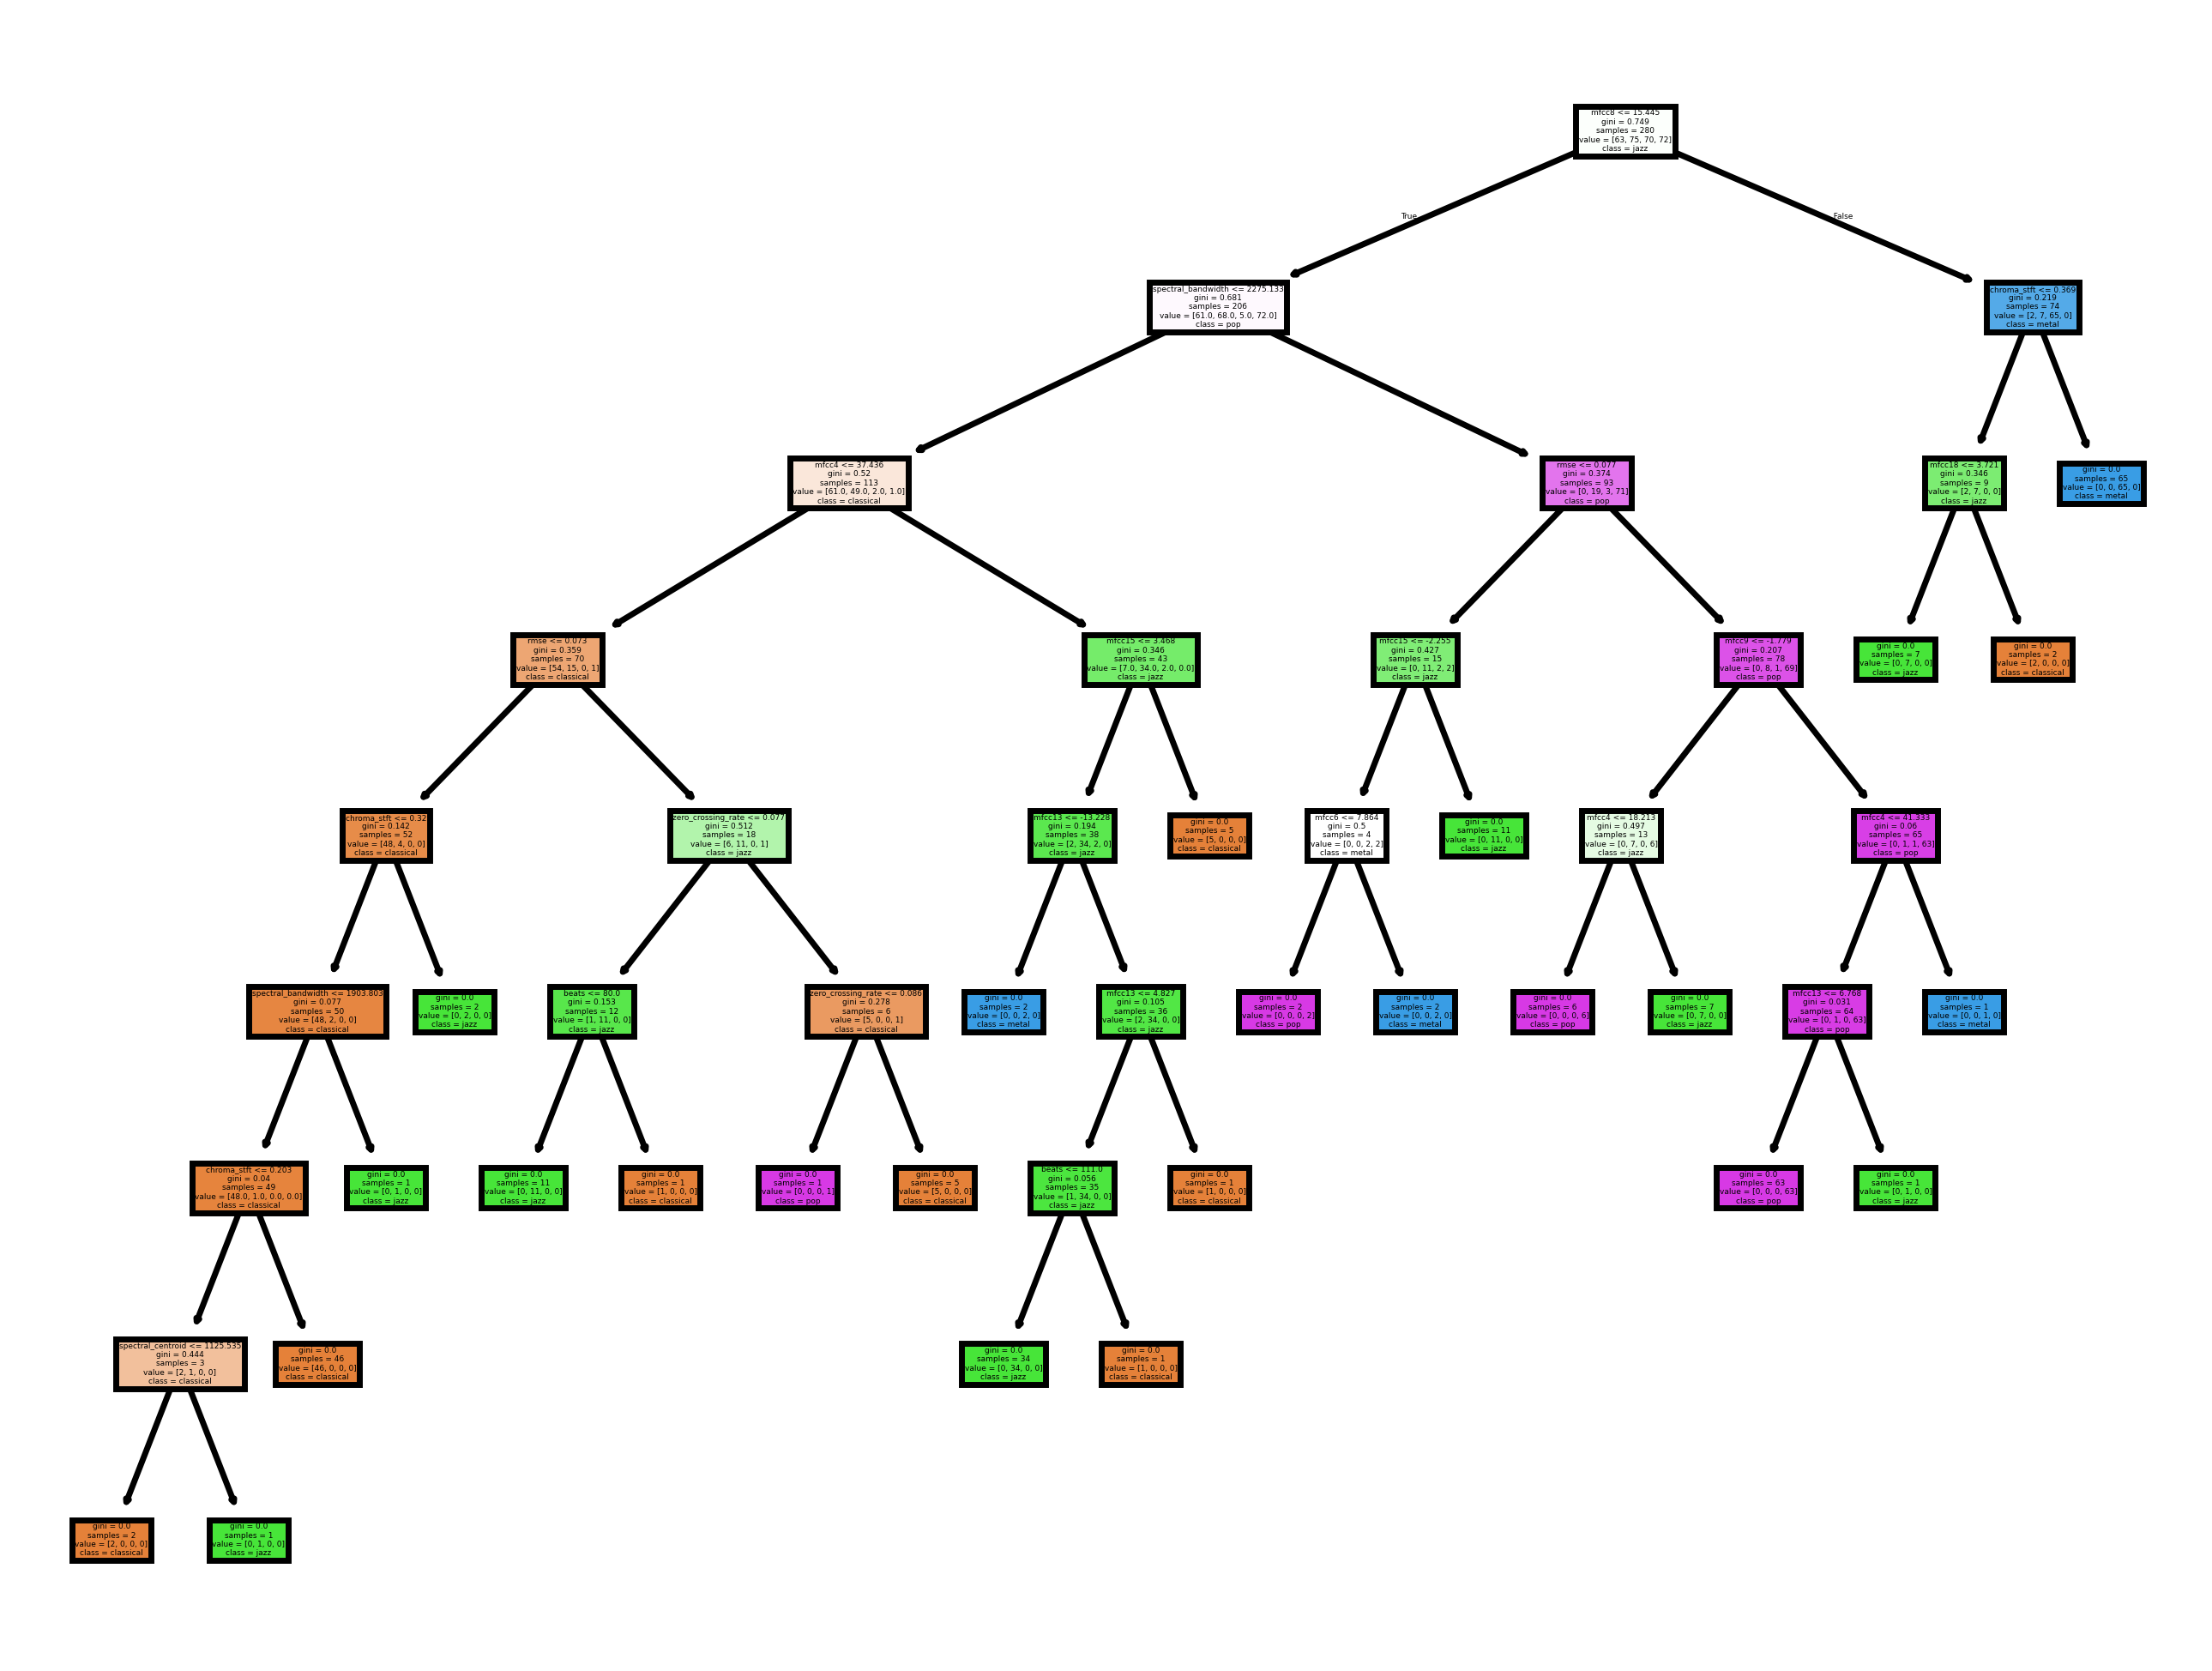

In [62]:
plt.figure(dpi=500)
plot_tree(model, filled = True, feature_names= model.feature_names_in_, class_names = model.classes_)
plt.show()

# Random forest

Este algoritmo obtiene una estadística de consenso entre varios árboles, cada uno entrenado sobre un subconjunto de los datos. El parámetro que regula el número de árboles promediados es _n_estimators_.

In [235]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[31  5  0  1]
 [ 1 19  1  4]
 [ 0  0 30  0]
 [ 0  0  0 28]]
              precision    recall  f1-score   support

   classical       0.97      0.84      0.90        37
        jazz       0.79      0.76      0.78        25
       metal       0.97      1.00      0.98        30
         pop       0.85      1.00      0.92        28

    accuracy                           0.90       120
   macro avg       0.89      0.90      0.89       120
weighted avg       0.90      0.90      0.90       120



Usando _"model.feature_importances_"_ podemos obtener la importancia relativa de cada columna (feature) de los datos. Para este dataset específico la característica más relevante es "mfcc4".

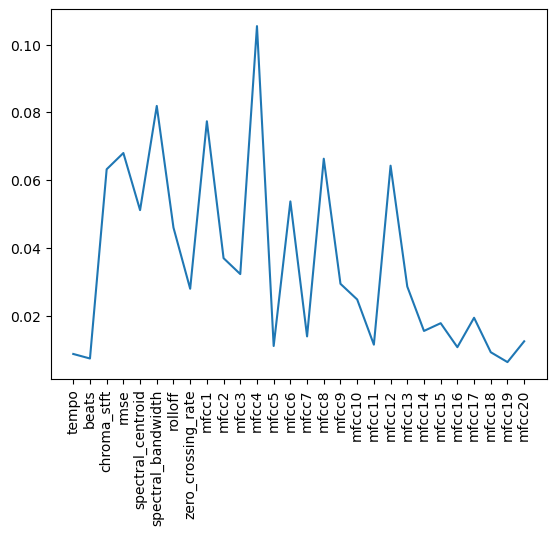

In [242]:
importances = model.feature_importances_
plt.plot(X_train.columns,importances)
plt.xticks(rotation = 90)
plt.show()